## 12. 다중 분류 - 원-핫 인코딩 (One-hot Encoding)
* 여러 개 값의 문자열로 이루어진 데이터를 0과 1로만 이루어진 형태로 만들어주는 과정
  
* 변환 방법  

    (1) 판다스의 get_dummies() 함수 활용  
    (2) Sklearn의 LabelEncoder와 Tensorflow의 tf.keras.utils.to_categorical()을 활용하는 방법

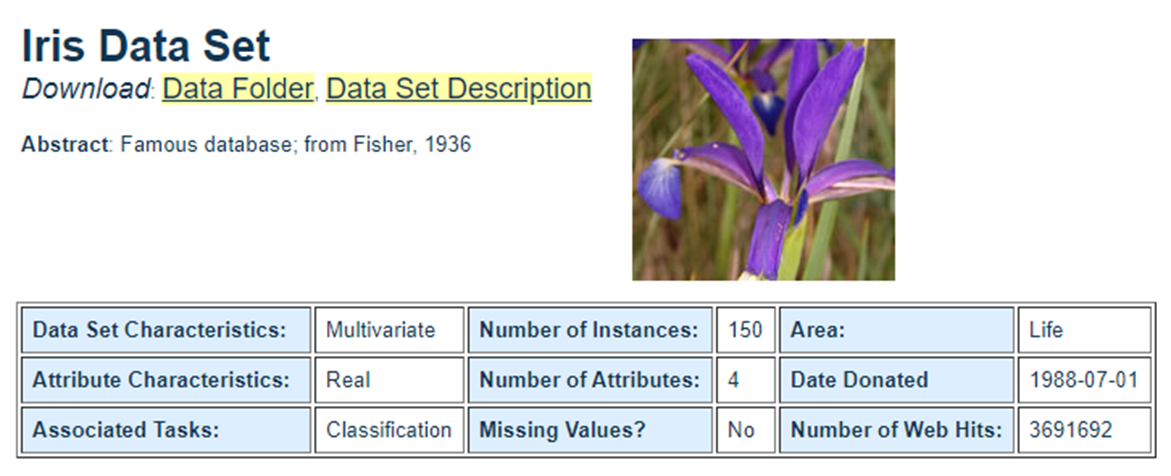
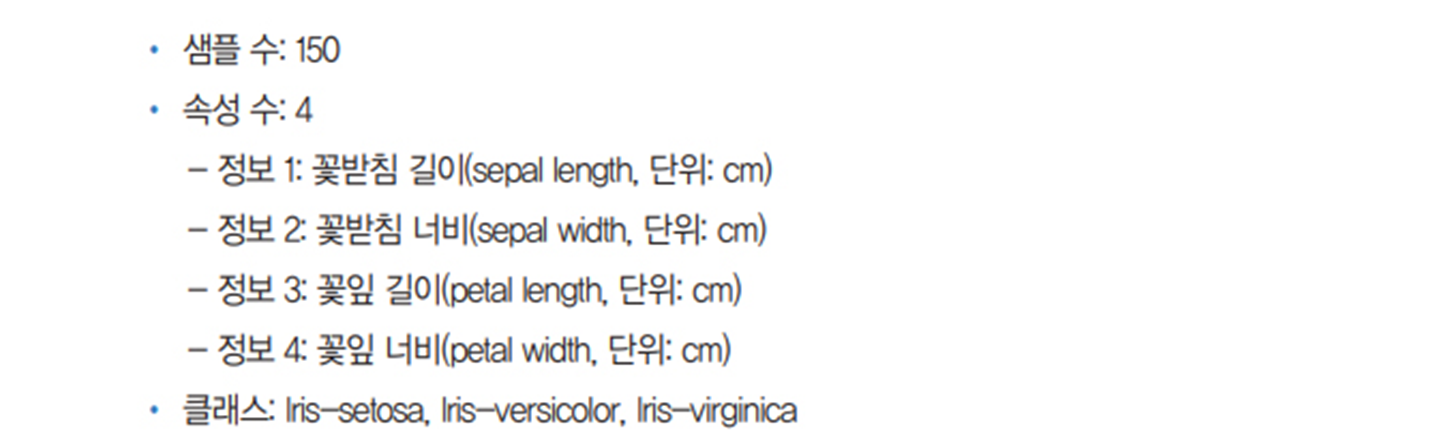

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
df_iris = pd.read_csv('../data/iris3.csv')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### **상관도 그래프**

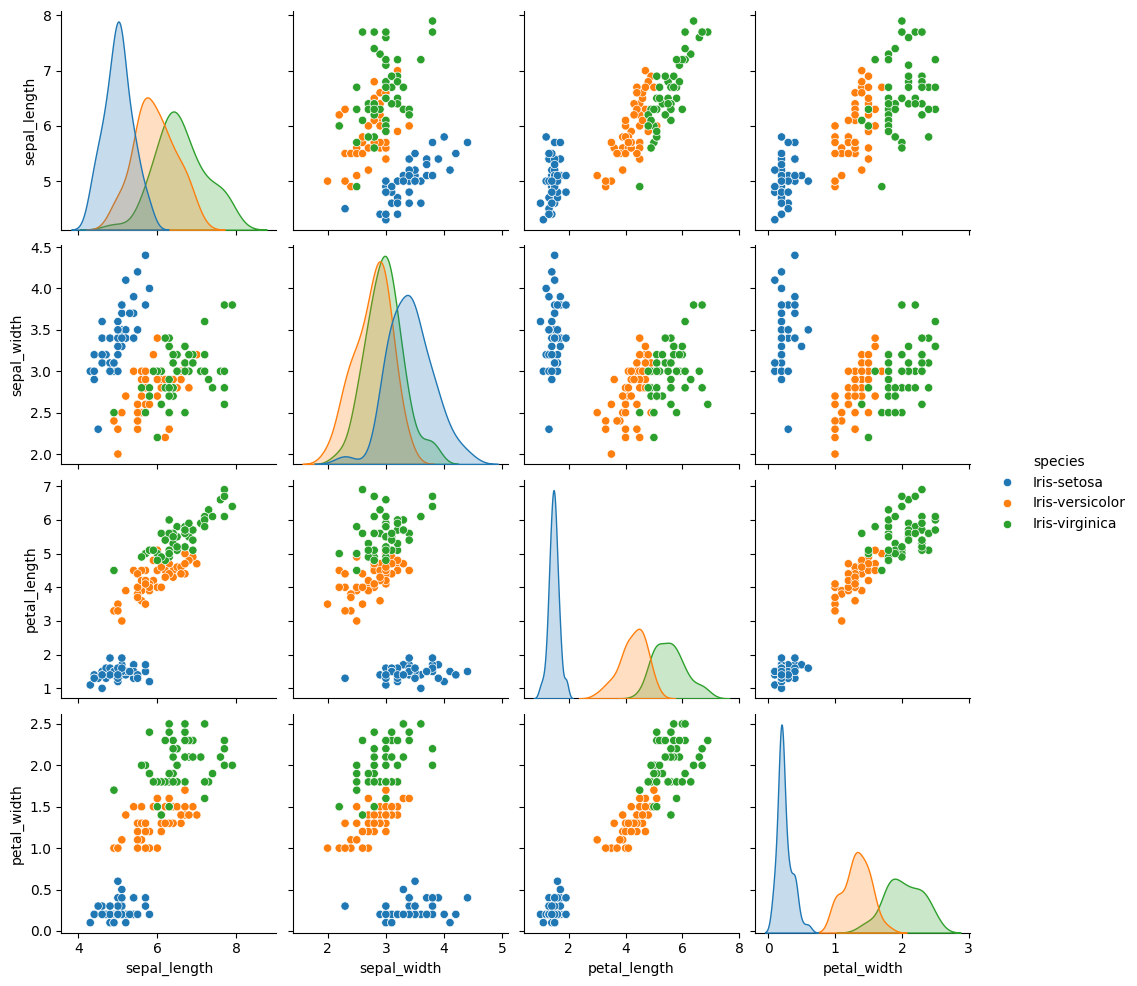

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프로 확인해 봅시다.
sns.pairplot(df_iris, hue='species');
plt.show()

In [3]:
df_iris.iloc[:, :4].values.dtype

dtype('float64')

In [4]:
X = df_iris.iloc[:, :-1]   # Pandas DataFrame
Y = df_iris.iloc[:, -1]    # Pandas Series data
X.shape, Y.shape

((150, 4), (150,))

In [5]:
Y.values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

### **One-hot Encoding**

### (1) Pandas의 get_dummies() 로 원핫인코딩

**원핫 인코딩 (One-Hot Encoding)**
* 여러 개의 값으로 된 문자열을 0과 1로만 이루어진 형태로 만들어 주는 과정을 원-핫 인코딩(one-hot encoding)이라고 함
* 원-핫 인코딩은 판다스가 제공하는 get_dummies() 함수를 사용하면 간단하게 해낼 수 있음

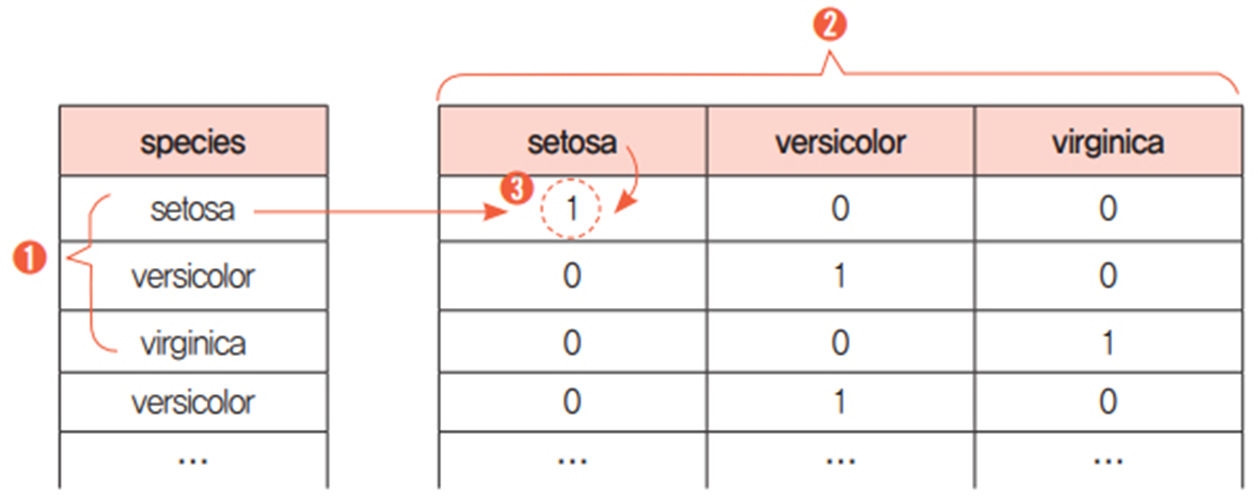

In [7]:
df_Y_onehot = pd.get_dummies(Y).astype(int)
# Y_onehot = pd.get_dummies(Y.values)  # numpy데이터를 입력해도 같은 결과!
df_Y_onehot

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [8]:
y_columns = df_Y_onehot.columns
y_columns

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [11]:
Y_onehot = df_Y_onehot.values.astype(int)
Y_onehot[:5], Y_onehot.shape

(array([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]]),
 (150, 3))

### (2) Sklearn과 Tensorflow로 One-hot Encoding

* Sklearn의 LabelEncoder는 데이터를 정수로 바꾸어줌

In [12]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y)
Y_encoded = e.transform(Y)
Y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* Tensorflow의 to_categorical 함수는 정수를 onehot 형태로 바꾸어줌

In [13]:
import tensorflow as tf

Y_onehot = tf.keras.utils.to_categorical(Y_encoded)
Y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

### **다중 분류 - Softmax**

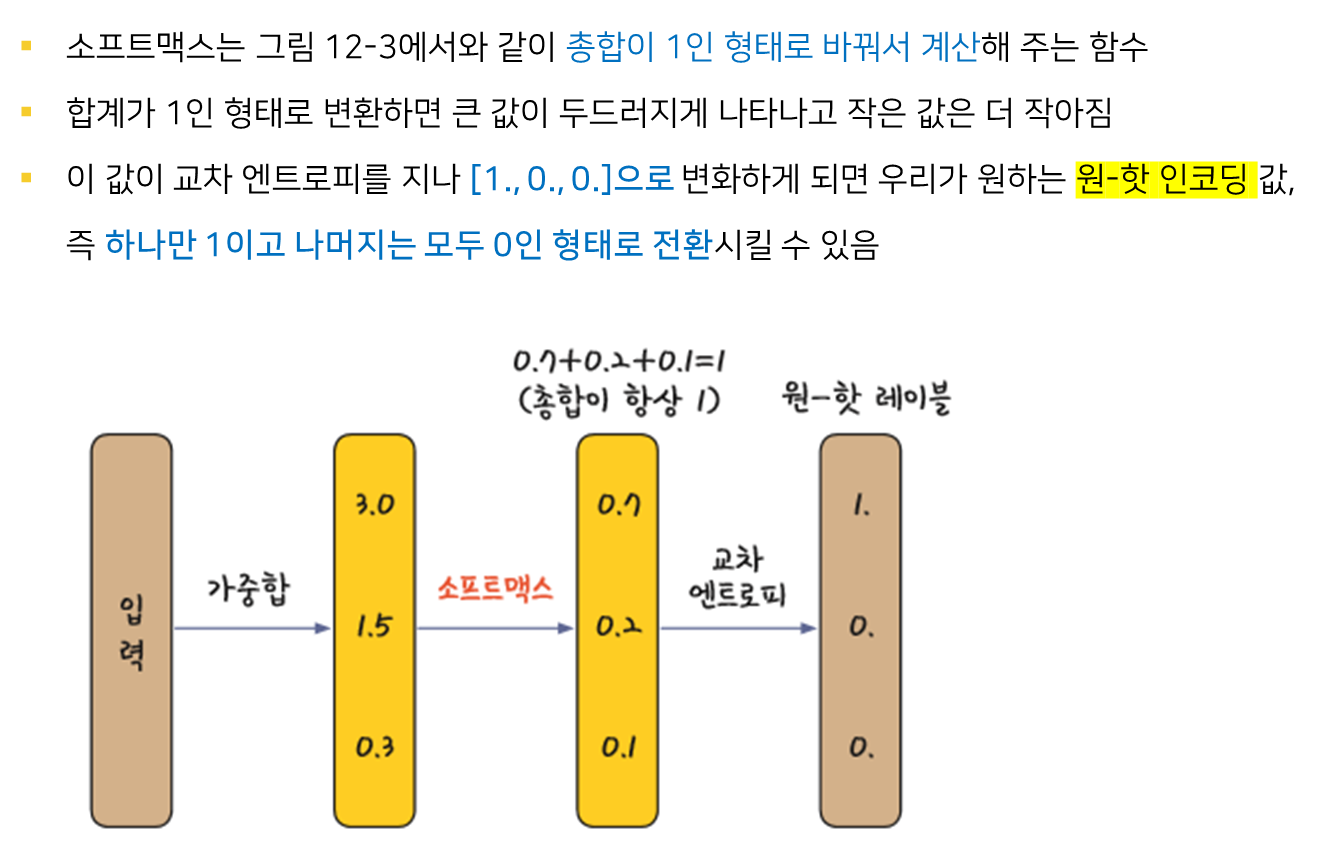

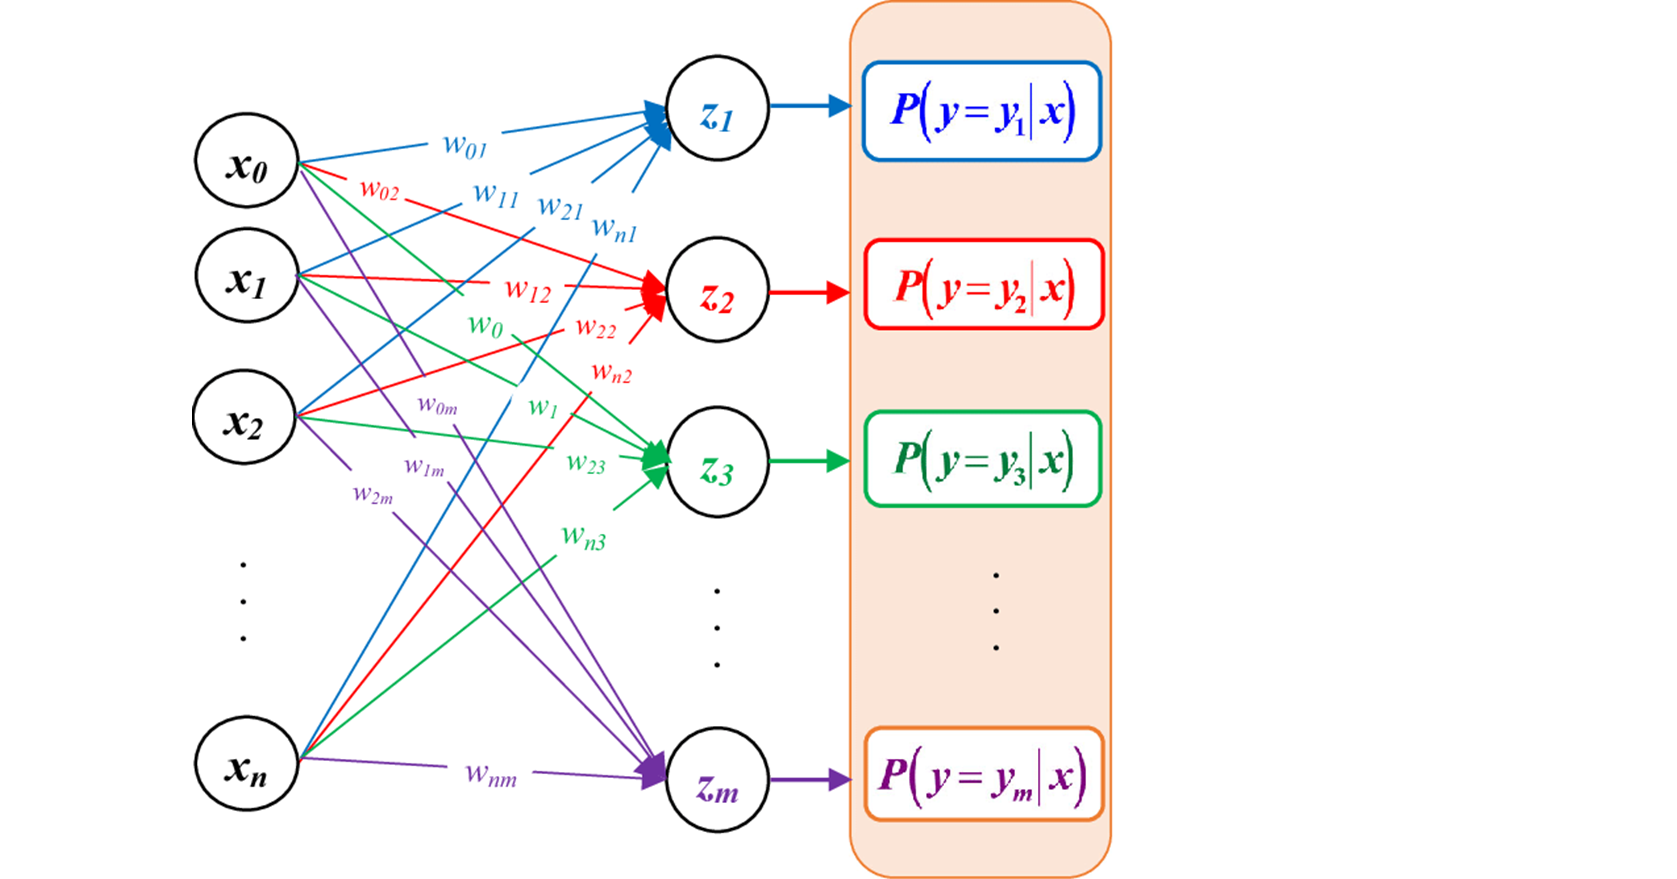

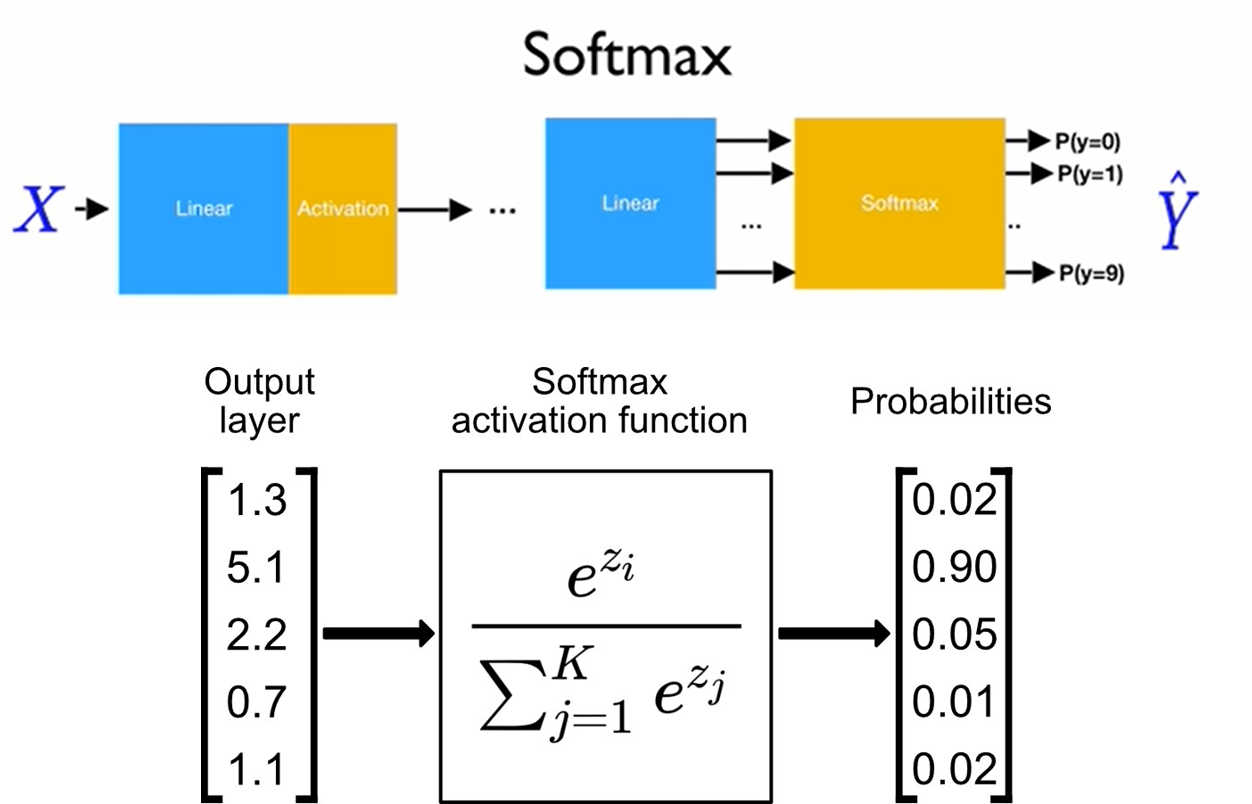

In [40]:
## Softmax 함수 구현
def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

Z = np.array([1.3, 5.1, 2.2, 0.7, 1.1])
s = softmax(Z)
s

array([0.02019046, 0.90253769, 0.04966053, 0.01108076, 0.01653055])

In [39]:
s.sum()

1.0

#### **다중분류 정리**
#### **(1) 활성화 함수 (activation function) : `activation='softmax'`** 
* 소프트맥스 함수는각 항목당 예측 확률을 0과 1 사이의 값으로 나타내 주는데, 이때 각 샘플당 예측 확률의 총합이 1인 형태로 바꾸어 주게 됨(예를 들어 1번 샘플의 경우 0.2 + 0.7 + 0.1 = 1이 됨)
* `activation`란에 `‘softmax’`라고 적어 주는 것으로 소프트맥스 함수를 바로 적용 할수 있음

#### **(2) 손실 함수 (loss function) : `loss='categorical_crossentropy'`** 
* 마찬가지로 **손실 함수**도 이전과는 달라져야 함
* 이항 분류에서 binary_crossentropy를 썼다면, 다항 분류에서는 `categorical_crossentropy`를 쓰면 됨

```python
    # 모델의 설정
    model = Sequential()
    model.add(Dense(16, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    # 모델 컴파일 
    model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])

```


In [19]:
#########################################################
# 12. 다중분류 - One Hot Encoding
# - 아이리스 품종 예측
# - One-hot encoding, - label encoder 사용
# - 활성화함수(Activation Function) : softmax
# - 비용함수(loss) : 'categorical_crossentropy'
#########################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 입력
df = pd.read_csv('../data/iris3.csv')

# 데이터 분류
dataset = df.values
X = dataset[:, 0:4].astype(float)  # dtype 'o'를 float로 바꾸어줘야 함
Y = dataset[:, 4]

# 문자열을 숫자로 변환 -> One Hot Encoding
e = LabelEncoder()
e.fit(Y)  # 라벨인코더를 Y_obj 데이터에 적용
print("*** e.classes_ : ", e.classes_)   # 라벨인코딩 결과 각 클래스명의 array
Y_encoded = e.transform(Y) # 문자데이터(species)를 0, 1, 2로 변환
Y_onehot = tf.keras.utils.to_categorical(Y_encoded) # One Hot Encoding
Y_onehot  # [1, 0, 0], [0, 1, 0], [0, 0, 1] 형태

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
hist = model.fit(X, Y_onehot, epochs=30, batch_size=5)

# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_onehot)[1]))  #[0]:loss, [1]:accuracy

*** e.classes_ :  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


c:\Users\jeong\anaconda3-1\envs\py310_human\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3333 - loss: 2.3301   
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3933 - loss: 1.6074 
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6200 - loss: 1.1658 
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4267 - loss: 0.9949 
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4400 - loss: 0.9064 
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - loss: 0.8513 
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - loss: 0.8060 
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7667 - loss: 0.7653 
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7600 - loss: 0.7317 
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8133 - loss: 0.6943 
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7667 - loss: 0.6634 
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

### history 데이터로 Loss와 Accuracy 그래프 그리기

In [20]:
hist.history.keys()

dict_keys(['accuracy', 'loss'])

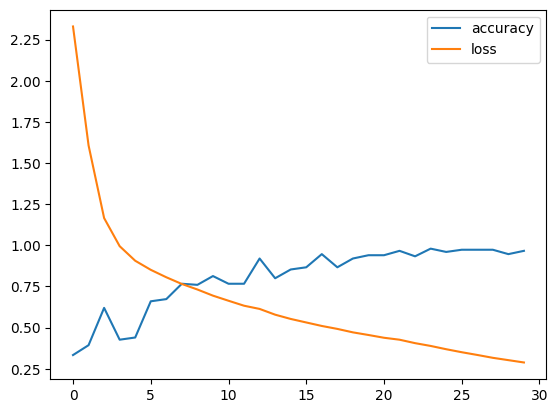

In [21]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.legend()
plt.show()

### 검증 데이터로 정확도 알아보기 : model.evaluate(X, Y)

In [22]:
model.evaluate(X, Y_onehot)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9733 - loss: 0.2767 


[0.2767486572265625, 0.9733333587646484]

In [23]:
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_onehot, verbose=0)[1]))  #[0]:loss, [1]:accuracy


 Accuracy: 0.9733


### 새로운 데이터로 꽃의 종류 예측해 보기

In [24]:
X[57]

array([4.9, 2.4, 3.3, 1. ])

In [25]:
new_X = np.array([ [5.1, 3.5, 1.4, 0.2],
                   [7.1, 3. , 5.9, 2.1],
                   [4.7, 3.2, 1.3, 0.2],
                   [4.9, 2.4, 3.3, 1. ]])   # softmax의 결과 array로 출력

model.predict(new_X).round(5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[9.6110e-01, 3.8870e-02, 2.0000e-05],
       [1.8300e-03, 1.8214e-01, 8.1603e-01],
       [9.4887e-01, 5.1060e-02, 6.0000e-05],
       [1.7873e-01, 6.5548e-01, 1.6579e-01]], dtype=float32)

In [26]:
Y_predicted = model.predict(new_X).argmax(axis=1)  
Y_predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([0, 2, 0, 1], dtype=int64)

### LabelEncoder의 e.classes_ 로 0, 1, 2,로 변환된 데이터의 순서와 명칭을 가져올 수 있음

In [27]:
e.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
### 4개의 꽃 종류 예측 (꽃 이름으로 return)
e.classes_[Y_predicted]

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

### [연습]학습된 모델로 계산된 결과를 꽃이름으로 가져오기

In [29]:
df.loc[[10, 15, 77, 123]]

,sepal_length,sepal_width,petal_length,petal_width,species
10,5.4,3.7,1.5,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
77,6.7,3.0,5.0,1.7,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica


In [30]:
new_X = df.loc[[10, 15, 77, 123]].iloc[:, :-1].values
new_X

array([[5.4, 3.7, 1.5, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3. , 5. , 1.7],
       [6.3, 2.7, 4.9, 1.8]])

In [31]:
e.classes_[model.predict(new_X).argmax(axis=1)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

## Pandas 의 get_dummies로 One Hot Encoding을 한 경우

In [32]:
#########################################################
# 12. 다중분류 - One Hot Encoding
# - 아이리스 품종 예측
# - One-hot encoding : pd.get_dummies 사용
#########################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 입력
df = pd.read_csv('../data/iris3.csv')

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values  # iris 꽃 이름 array

df_Y = pd.get_dummies(df.species)
Y_onehot = df_Y.values
print("*** One Hot 컬럼명 :", df_Y.columns)   # One Hot vector에서 꽃이름으로 변환할 때 사용
# Y_onehot

*** One Hot 컬럼명 : Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


In [33]:
# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
hist = model.fit(X, Y_onehot, epochs=50, batch_size=1)

# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_onehot)[1]))  #[0]:loss, [1]:accuracy

Epoch 1/50


c:\Users\jeong\anaconda3-1\envs\py310_human\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3600 - loss: 1.3654
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7467 - loss: 0.8606  
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7933 - loss: 0.7544
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8267 - loss: 0.6725
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7867 - loss: 0.6103
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8133 - loss: 0.5573
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8667 - loss: 0.5190
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8533 - loss: 0.4791
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9333 - loss: 0.4555
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9400 - loss: 0.4268
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9133 - loss: 0.4039
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

### 새로운 데이터로 꽃의 종류 예측하기 (pd.get_dummies 사용시)

In [34]:
new_X = np.array([ [5.1, 3.5, 1.4, 0.2],
                   [7.1, 3. , 5.9, 2.1],
                   [4.7, 3.2, 1.3, 0.2],
                   [4.9, 2.4, 3.3, 1. ]])   # softmax의 결과 array로 출력

Y_predicted = model.predict(new_X).argmax(axis=1)
Y_predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([0, 2, 0, 1], dtype=int64)

In [35]:
df_Y = pd.get_dummies(Y)
df_Y.columns

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [36]:
Y_predicted_names = df_Y.columns[Y_predicted]
Y_predicted_names

Index(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype='object')